In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/data/breast_version2.v1i.yolov8.zip"

Archive:  /content/drive/MyDrive/data/breast_version2.v1i.yolov8.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/106_jpg.rf.4291f4faa9b488178b89432573dbd162.jpg  
 extracting: test/images/109_jpg.rf.97c278f794ae7a6f6b391e9115232c4e.jpg  
 extracting: test/images/115_jpg.rf.ad29314b7f8ba305f8c1b63c94ca1994.jpg  
 extracting: test/images/11_jpg.rf.2fe7da9623cf96dd8e243baeb509af4b.jpg  
 extracting: test/images/141_jpg.rf.19de78ca427f113f8080094f2c4fea79.jpg  
 extracting: test/images/148_jpg.rf.52a84d1eacd91463f2227233983f21fe.jpg  
 extracting: test/images/149_jpg.rf.c5f8a4ead0f7b6855fc8a73aedbba08a.jpg  
 extracting: test/images/175_jpg.rf.c5338db1ff60d478036d69ee17785e8c.jpg  
 extracting: test/images/191_jpg.rf.6930c9baf376261b36e636fcda97a7dd.jpg  
 extracting: test/images/195_jpg.rf.1e5e062da6da64dbde054fa274c0deac.jpg  
 extracting: test/image

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 87.0MB/s]



In [ ]:
import subprocess

model_path = "/content/yolov8n.pt"
dataset_path = "/content/data.yaml"
command = "yolo task=detect mode=train model={} data={} epochs=40 imgsz=800".format(
    model_path, dataset_path
)

## Custom Training

In [ ]:
proc = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
for line in proc.stdout:
    print("--- ", line.strip())


KeyboardInterrupt: ignored

# **resim**

In [ ]:
infer =YOLO("/content/runs/detect/train/weights/best.pt")#pt dosya uzantısı verilir.
infer.predict("/content/qlorabaslangic.png",save=True , save_txt=True)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
Results saved to runs/detect/predict2
1 label saved to runs/detect/predict2/labels


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([1, 6])
 dtype: torch.float32
  + tensor([[121.00000, 266.00000, 214.00000, 389.00000,   0.62099,   0.00000]], device='cuda:0')]

# **Video için**

In [ ]:
model="" source=""

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch1.jpg
confusion_matrix.png				    train_batch2.jpg
events.out.tfevents.1679035825.d4721b3eee4e.8803.0  val_batch0_labels.jpg
F1_curve.png					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights
train_batch0.jpg


/content


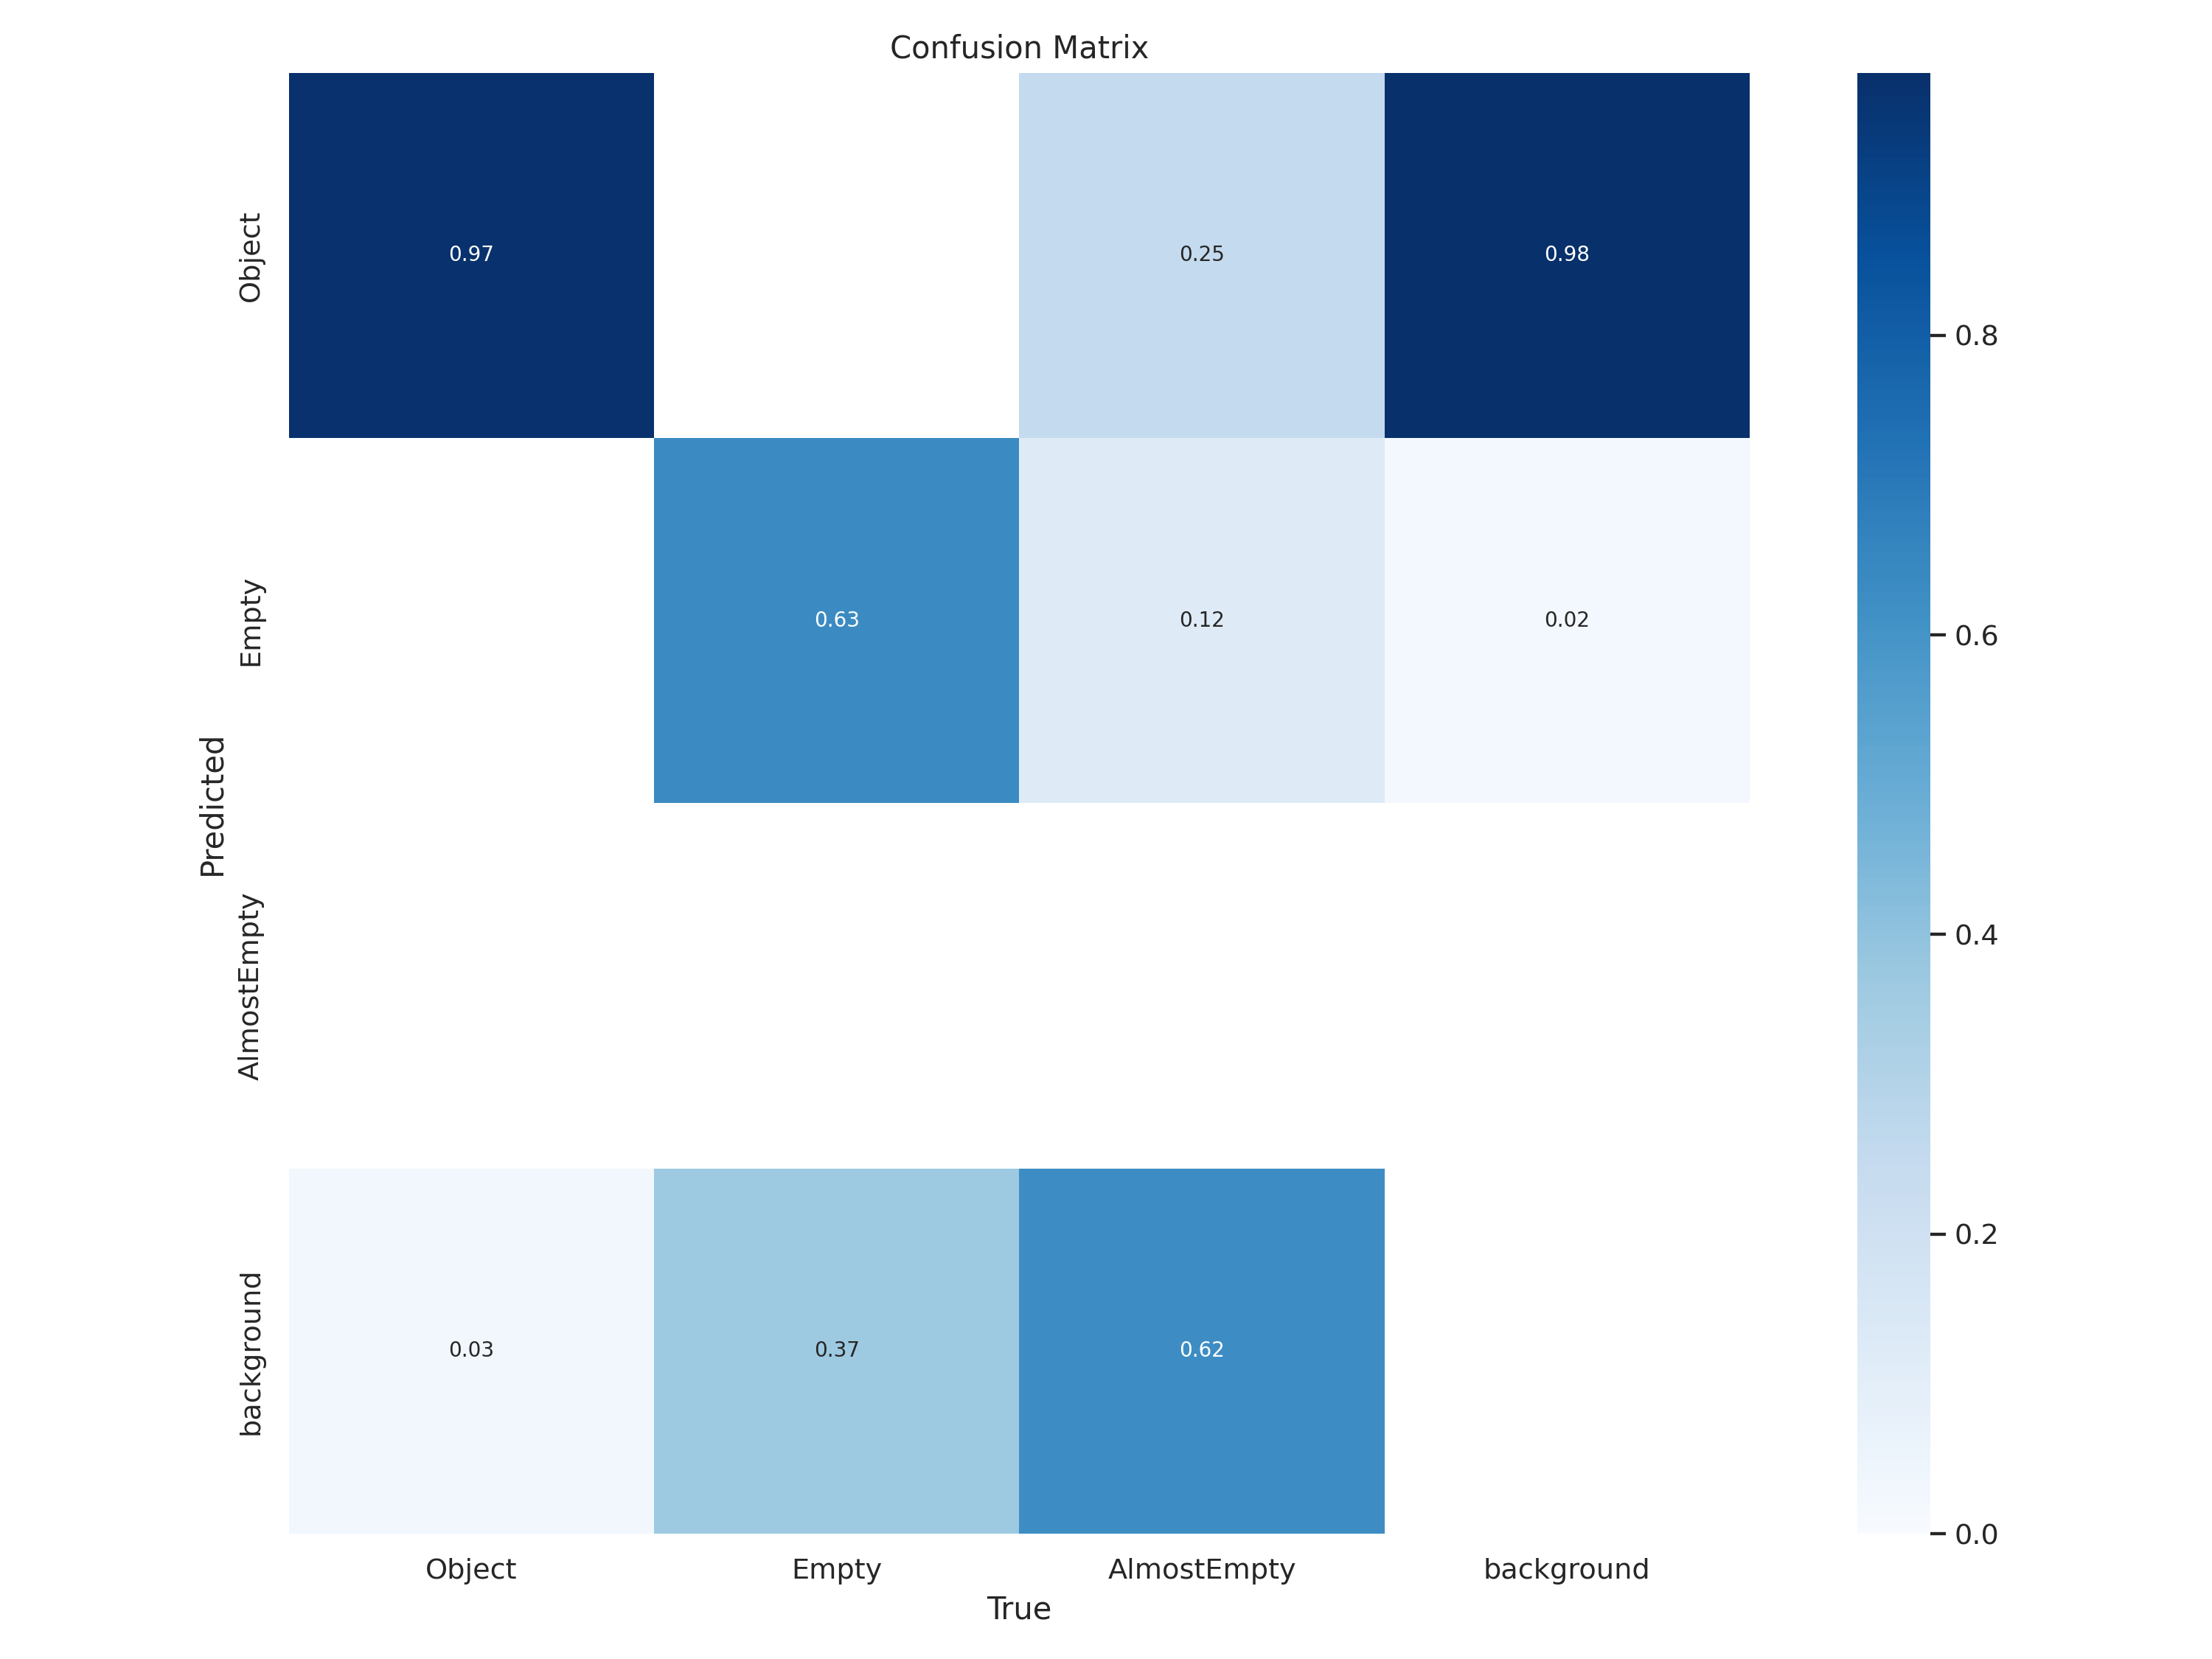

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


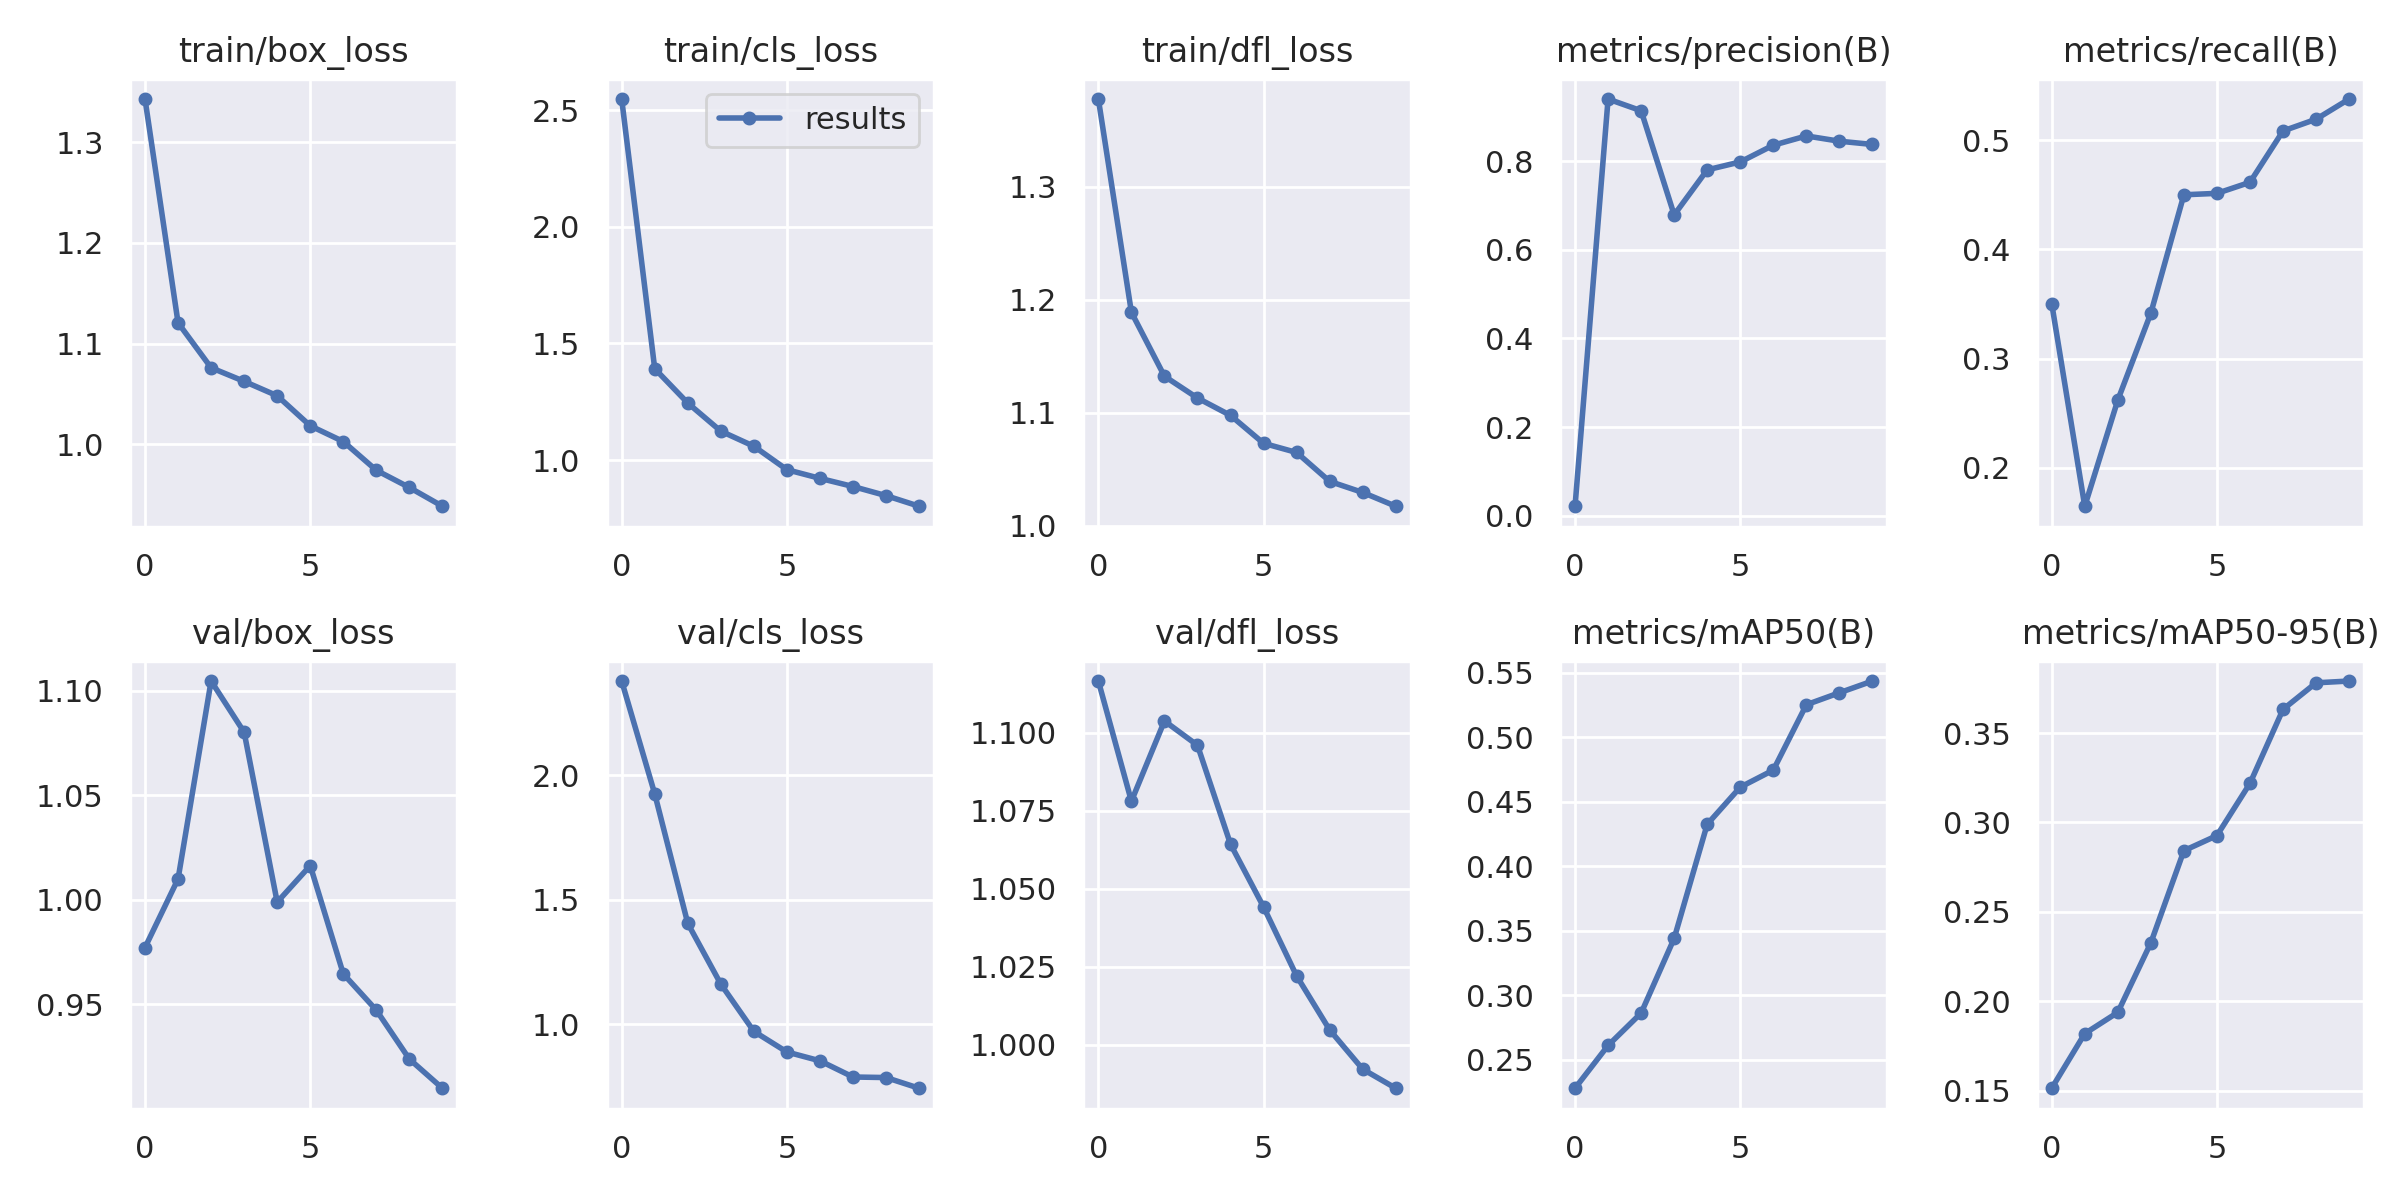

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


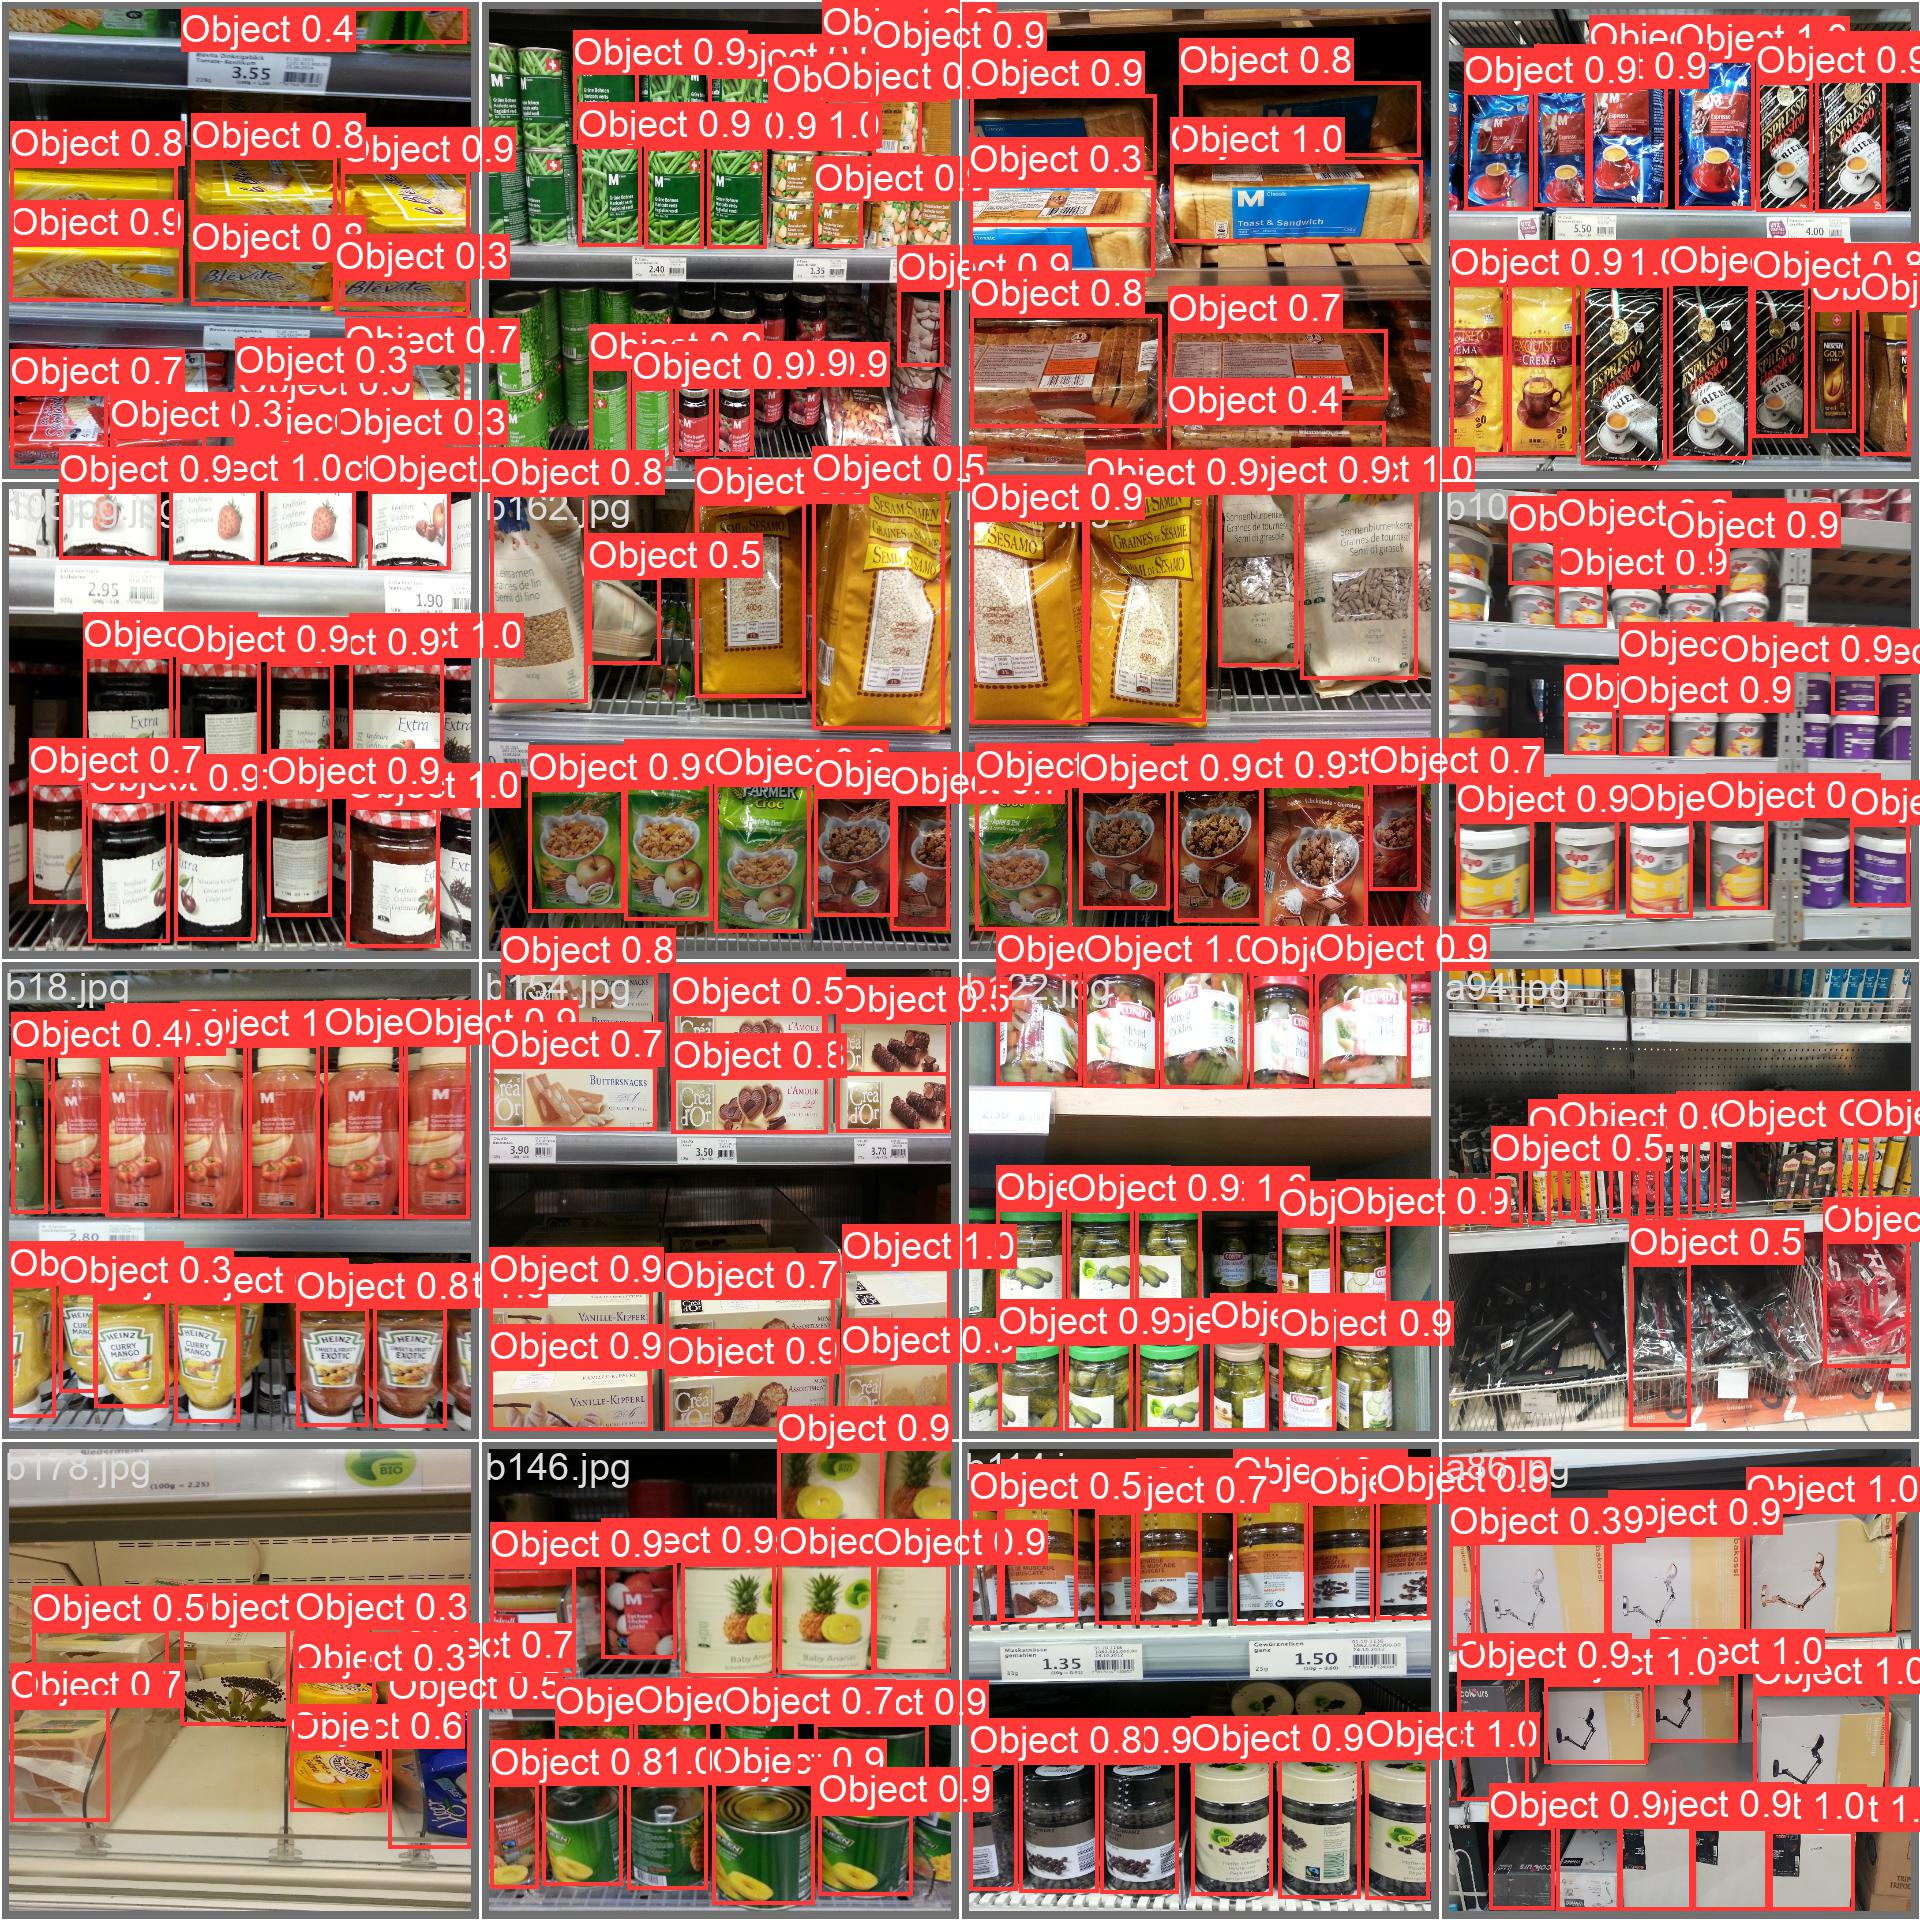

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.9 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/football-players-detection-1/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100% 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.25s/it]
                   all         38        905       0.81      0.726      0.762      0.493
                  ball         38         35      0.788      0.229      0.293     0.0589
            goalkeeper         38         27      0.799      0.963      0.953       0.66
                player         38        754      0.937      0.938      0.973      0.737
               referee         38         89      0.716      0.775      0.828      0.515
Speed: 2.1ms pre-process, 7.0ms inference, 0.0ms loss, 1.6ms post-process per image


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.9 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
image 1/13 /content/datasets/football-players-detection-1/test/images/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.jpg: 384x640 21 players, 15.0ms
image 2/13 /content/datasets/football-players-detection-1/test/images/42ba34_1_5_png.rf.4337fde8fbe3640cf4351fb41ac9c3ca.jpg: 384x640 1 goalkeeper, 21 players, 2 referees, 11.6ms
image 3/13 /content/datasets/football-players-detection-1/test/images/42ba34_5_5_png.rf.ceb556bd4c92d41496ae1d8c56600c4a.jpg: 384x640 1 goalkeeper, 20 players, 1 referee, 11.7ms
image 4/13 /content/datasets/football-players-detection-1/test/images/4b770a_1_4_png.rf.5a45b3b841a06de414ceb802e34c136f.jpg: 384x640 1 goalkeeper, 20 players, 4 referees, 11.6ms
image 5/13 /content/datasets/football-players-detection-1/test/images/4b770a_3_6_png.rf.d0d9403f2f73ca0da7a6a1373c02b749.jpg: